In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

os.chdir("C:\\Users\\Gebruiker\\Desktop\\Rotzooi begint hier\\uvt\\healthlynx")

data = pd.read_csv('verzekering.csv', delimiter = ';')

In [8]:
data.head()

,Geslacht,Leeftijd,Gestandaardiseerd inkomen,Zorgvorm Zvw-zorgkosten,Perioden,Gemiddelde zorgkosten volgens de Zvw (euro)
0,Totaal mannen en vrouwen,"Totaal, gestandaardiseerd",Totaal alle inkomens,Totaal alle zorgvormen,2009,2032
1,Totaal mannen en vrouwen,"Totaal, gestandaardiseerd",Totaal alle inkomens,Totaal alle zorgvormen,2010,2099
2,Totaal mannen en vrouwen,"Totaal, gestandaardiseerd",Totaal alle inkomens,Totaal alle zorgvormen,2011,2115
3,Totaal mannen en vrouwen,"Totaal, gestandaardiseerd",Totaal alle inkomens,Totaal alle zorgvormen,2012,2078
4,Totaal mannen en vrouwen,"Totaal, gestandaardiseerd",Totaal alle inkomens,Totaal alle zorgvormen,2013,2186


In [39]:
y = data['Gemiddelde zorgkosten volgens de Zvw (euro)'][:11]
X = data['Perioden'][:11]

year2019 = []
for i in range(len(data['Perioden'])):
    if data['Perioden'][i] == '2019*':
        year2019.append(data['Gemiddelde zorgkosten volgens de Zvw (euro)'][i])
        
        print('yes')

print(year2019)

yes
yes
yes
yes
yes
yes
yes
yes
[2625, 3118, 3537, 2975, 2685, 2512, 2402, 2333]


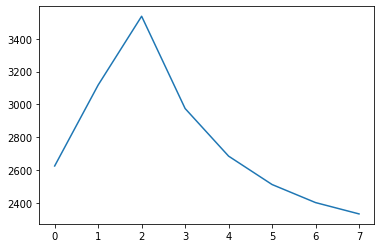

In [40]:
plt.plot(year2019)


In [144]:
incomes = pd.read_csv('incomes.csv', delimiter = ';')
incomes.head()
full = pd.read_csv('lookup.csv', delimiter = ',')
full.head(10)

,Unnamed: 0,Age,Neighbourhood,Scale,Good_Health,Sufficient_Exercise,Severe_Obesity,Smoking,Low_Alcohol,Illness,Disability,Anxiety_Depression,High_Stress,Severe_Loneliness,Caretaker,Volunteer_Worker
0,1,18 jaar of ouder,Nederland,Land,78.4,49.9,15.6,17.9,43.9,32.5,15.2,6.7,17.9,11.2,13.6,24.6
1,2,18 jaar of ouder,'s-Hertogenbosch,Gemeente,78.0,48.1,15.4,18.4,38.8,32.1,15.2,7.4,18.6,11.2,13.5,22.9
2,3,18 jaar of ouder,Binnenstad,Wijk,80.3,54.8,11.4,22.2,27.8,30.0,12.7,8.4,22.1,12.2,11.3,22.4
3,4,18 jaar of ouder,Binnenstad-Centrum,Buurt,82.5,56.5,10.5,21.5,25.0,28.1,10.6,7.6,22.0,11.3,11.1,22.3
4,5,18 jaar of ouder,Binnenstad-Oost,Buurt,79.4,55.3,10.8,20.9,27.7,31.6,14.0,8.0,20.7,11.6,12.6,24.1
5,6,18 jaar of ouder,De Hofstad,Buurt,77.9,56.1,13.4,25.5,32.4,30.9,15.2,10.4,24.6,13.7,9.9,20.0
6,7,18 jaar of ouder,Binnenstad-Noord,Buurt,69.4,46.6,15.2,23.9,39.2,40.4,24.3,9.9,19.6,16.3,12.7,21.6
7,8,18 jaar of ouder,Het Zand,Buurt,79.9,52.4,12.1,24.4,28.9,30.0,12.6,9.9,24.4,13.7,10.3,21.5
8,9,18 jaar of ouder,Vughterpoort,Buurt,87.4,56.6,8.2,7.6,28.0,25.4,7.6,2.5,12.7,5.5,17.0,33.8
9,10,18 jaar of ouder,Zuidoost,Wijk,74.3,47.9,16.0,19.4,40.3,35.1,18.6,8.4,19.0,12.6,13.1,21.3


In [227]:
base_life_expectancy = 82.01 #cbs middelbare scholing


# Constants
cSmoke = 9 #interval -5 moderate smokers -9 years heavy smokers -12 years (cbs.nl)
cObese = 10 #severe obesity -10 years (ox.ac.uk)
cAlco = 1 #moderation alcohol +1 year (nature.com)
cAlcolow = 7 #more than recommended drinkers -7 years
cStress = 2.8 #high stress -2.8 years (sciencedaily.com)
cLonely = 15 #loneliness -15 years (scientificamerican.com)
cExercise = 4.5 #exercise ~+4.5 years (reimers, 2012)
bias = 8.4

# Influential factors (% of population)

mSmoke = 0
mObese = 0
mAlcolow = 0
mStress = 0
mLonely = 0
mExercise = 0



class Neighbourhood:
    def __init__(self,name, health,  exercise, obesity, smoking, 
                lowalco, illness,  disability, anxiety, stress, lonely):
        
        self.name = name
        self.obesity = obesity
        self.smoking = smoking
        self.lowalco = lowalco
        self.diability = disability
        self.anxiety = anxiety
        self.stress = stress
        self.lonely = lonely
        self.exercise = exercise
        
        
    def calculate_life(self):
        
        smoke = 0.01*(self.smoking+mSmoke)*cSmoke
        obese = 0.01*(self.obesity+mObese)*cObese
        hialco = abs(0.01*(1-self.lowalco-mAlcolow)*cAlcolow) 
        stress = 0.01*(self.stress+mStress)*cStress
        lonely = 0.01*(self.lonely+mLonely)*cLonely
        exercise = 0.01*(self.exercise+mExercise)*cExercise
        
        life_expectancy = base_life_expectancy + smoke + obese + hialco + stress + lonely - bias
        
        
        return life_expectancy
    
    def __repr__(self):
        return "Neighbourhood: {}, Life expectancy: {}".format(self.name, self.calculate_life())
    
hoods = []
    
for i in range(len(full['Age'])):
     hoods.append(Neighbourhood(full['Neighbourhood'][i],full['Good_Health'][i], full['Sufficient_Exercise'][i],
                               full['Severe_Obesity'][i],full['Smoking'][i],full['Low_Alcohol'][i],full['Illness'][i],
                               full['Disability'][i],full['Anxiety_Depression'][i],full['High_Stress'][i],
                                full['Severe_Loneliness'][i]))
    
h = []
expectancies = []


print(hoods[0].calculate_life())
for i in range(len(hoods)):
    h.append(hoods[i].name)
    expectancies.append(hoods[i].calculate_life())




baseline = hoods[0].calculate_life()
def normalize(n):
    return ((n-baseline)/baseline)*100

expectancies = np.array(expectancies)
exp_norm = normalize(expectancies)
#print(exp_norm)

df = pd.DataFrame({'Neighbourhood':h, 'Life_expectancy': exp_norm})
df.head(10)


#df.to_csv('Life_expectancies_model.csv')

81.96520000000001


,Neighbourhood,Life_expectancy
0,Nederland,0.000000
1,'s-Hertogenbosch,-0.381137
2,Binnenstad,-1.088755
3,Binnenstad-Centrum,-1.682665
4,Binnenstad-Oost,-1.470868
5,De Hofstad,0.270359
6,Binnenstad-Noord,1.200021
7,Het Zand,-0.314768
8,Vughterpoort,-4.612445
9,Zuidoost,0.199841


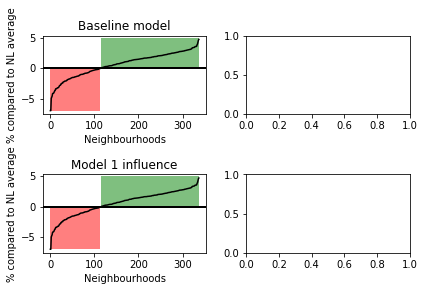

In [228]:
import matplotlib.collections as collections

base = pd.read_csv('Life_expectancies.csv')
mod1 = pd.read_csv('Life_expectancies_model.csv')

base_sort = np.array(sorted(list(base['Life_expectancy'])))

mod1_sort = np.array(sorted(list(mod1['Life_expectancy'])))


t = np.arange(0,338)
#s1 = np.sin(2*np.pi*t)
#s2 = 1.2*np.sin(4*np.pi*t)


fig, ax = plt.subplots(ncols = 2, nrows = 2)



#baseline

#Life expectancy = 82.01

#fig.suptitle('s-Hertogenbosch Neighbourhood Life Expectation')

ax[0][0].set_ylabel('% compared to NL average')
ax[0][0].set_xlabel('Neighbourhoods')
ax[0][0].plot(t, base_sort, color='black')
ax[0][0].axhline(0, color='black', lw=2)
ax[0][0].set_title('Baseline model')

collection = collections.BrokenBarHCollection.span_where(
    t, ymin=0, ymax=5, where=base_sort > 0, facecolor='green', alpha=0.5)
ax[0][0].add_collection(collection)

collection = collections.BrokenBarHCollection.span_where(
    t, ymin=-7, ymax=0, where=base_sort < 0, facecolor='red', alpha=0.5)
ax[0][0].add_collection(collection)

#comparison
#life expectancy = ?

ax[1][0].set_ylabel('% compared to NL average')
ax[1][0].set_xlabel('Neighbourhoods')
ax[1][0].plot(t, mod1_sort, color='black')
ax[1][0].axhline(0, color='black', lw=2)
ax[1][0].set_title('Model 1 influence')

collection = collections.BrokenBarHCollection.span_where(
    t, ymin=0, ymax=5, where=mod1_sort > 0, facecolor='green', alpha=0.5)
ax[1][0].add_collection(collection)

collection = collections.BrokenBarHCollection.span_where(
    t, ymin=-7, ymax=0, where=mod1_sort < 0, facecolor='red', alpha=0.5)
ax[1][0].add_collection(collection)


#comparison
#life expectancy = ?

# ax[0][1].set_ylabel('% compared to NL average')
# ax[0][1].set_xlabel('Neighbourhoods')
# ax[0][1].plot(t, mod2_sort, color='black')
# ax[0][1].axhline(0, color='black', lw=2)
# ax[0][1].set_title('Model 2 influence')

# collection = collections.BrokenBarHCollection.span_where(
#     t, ymin=0, ymax=5, where=mod2_sort > 0, facecolor='green', alpha=0.5)
# ax[0][1].add_collection(collection)

# collection = collections.BrokenBarHCollection.span_where(
#     t, ymin=-7, ymax=0, where=mod2_sort < 0, facecolor='red', alpha=0.5)
# ax[0][1].add_collection(collection)

# #comparison 3
# #life expectancy? 
# ax[1][1].set_ylabel('% compared to NL average')
# ax[1][1].set_xlabel('Neighbourhoods')
# ax[1][1].plot(t, mod3_sort, color='black')
# ax[1][1].axhline(0, color='black', lw=2)
# ax[1][1].set_title('Model 3 influence')

# collection = collections.BrokenBarHCollection.span_where(
#     t, ymin=0, ymax=5, where=mod3_sort > 0, facecolor='green', alpha=0.5)
# ax[1][1].add_collection(collection)

# collection = collections.BrokenBarHCollection.span_where(
#     t, ymin=-7, ymax=0, where=mod3_sort < 0, facecolor='red', alpha=0.5)
# ax[1][1].add_collection(collection)

plt.tight_layout()
plt.show()

In [229]:
print(df['Life_expectancy'].sort_values())
print(hoods[166])
print(hoods[125])


125   -4.740792
8     -4.612445
242   -4.320126
180   -3.996818
63    -3.860419
331   -3.611533
154   -3.583228
164   -3.574200
291   -3.570784
37    -3.535647
150   -3.434872
269   -3.412424
326   -3.395343
47    -3.393879
148   -3.374847
153   -3.359475
172   -3.223075
233   -3.203555
228   -3.133281
33    -3.118153
204   -3.090580
102   -3.087408
231   -3.059591
219   -3.017378
36    -3.010546
222   -2.996150
181   -2.993466
163   -2.979313
64    -2.953449
149   -2.942712
         ...   
95     2.260228
211    2.434448
184    2.436400
212    2.467633
315    2.571823
248    2.582071
190    2.782156
294    2.797285
298    2.831934
73     2.958085
70     3.111564
66     3.192818
249    3.214047
187    3.218439
299    3.303109
183    3.354106
246    3.358254
65     3.392659
13     3.642765
130    3.678146
72     3.824306
17     4.018047
182    4.113941
189    4.126629
301    4.175187
71     4.575356
134    4.759337
188    4.953810
166    6.968079
49     6.968079
Name: Life_expectancy, L